# Contents
01 - Import Library
02 - Import Data Set
03 - Chech for Security Issues
04- Create Region Flag 
05- Exclude the Customer Under 5 Max Orders
06-Create an Age Flag
 6.1- Create an Income Group
 6.2-Create a Child Status Group
07.1-Create Visualization- Sales Per Region
 7.2-Create Visualization- Loyalty Per Family Status
 7.3- Create Visualization-  Favourite Departments Per Gender
 7.4- Create Visualization- Count of Customers by Child Status
 7.5- Create Visualization-  Favourite Departments Per Income Group
 7.7- Create Visualization- Age Group Per Gender
 7.8- Create Visualization- Age Group Per Region
 7.9- Create Visualization- Order Time of the Day Per Age Group
 7.10- Create Visualization- Order Day of Week Per Age Group
 7.12- Create Visualization- Order Day of Week Per Loyalty
 7.13- Create Visualization- Order Day of Week Per Region
 7.14- Create Visualization- Order Day of Week Per Family Status
 7.15-  Create Visualization- Spending Per Region
 7.16- Create Visualization- Customers Per Family Status
 7.17- Create Visualization- Customers Per Income Group
08-Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure
09-Compare your customer profiles with regions and departments
10-Find Further Answers
11-Export the Data Set

# 01.Import Library


In [1]:
# libraries are imported
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


# 02.Import Data Set

In [2]:
# the data set is imported
ords_prods_merge=pd.read_pickle(r'C:\Users\Ida\Desktop\Instacart Basket Analysis\02 Data\Prepared Data\orders_products_newest.pkl')

In [3]:
# path to folders are created
path=r'C:\Users\Ida\Desktop\Instacart Basket Analysis'

# 03. Check for Security Issues


In [4]:
# check for security issues are done and obesravtion is summarized.
ords_prods_merge.head()

,user_id,Gender,State,Age,Joined Date,Family Status,Income,order_id,order_number,orders_day_of_week,...,busiest_day,busiest_days,busiest_period_of_day,max,loyalty_flag,average_price,spending_flag,median_order,frequency_flag,_merge
0,26711,Female,Missouri,48,1/1/2017,married,165665,2543867,5,1,...,Regularly busy,Busiest days,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
1,26711,Female,Missouri,48,1/1/2017,married,165665,1285508,7,5,...,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
2,26711,Female,Missouri,48,1/1/2017,married,165665,2578584,8,1,...,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
3,26711,Female,Missouri,48,1/1/2017,married,165665,423547,2,2,...,Regularly busy,Regularly busy,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
4,26711,Female,Missouri,48,1/1/2017,married,165665,2524893,3,3,...,Regularly busy,Slowest Days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both


### There is not any data that is Pll because they have been dropped due to security issues. There is no address or email present in the dataframe. There is no other Pll data.

# 04. Create Region Flag

### The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.


In [5]:
# Lists are created
Northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
Midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
South= ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
West= ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [6]:
# Groups for regions are created
ords_prods_merge.loc[ords_prods_merge['State'].isin(Northeast), 'region'] = 'Northeast'
ords_prods_merge.loc[ords_prods_merge['State'].isin(Midwest), 'region'] = 'Midwest'
ords_prods_merge.loc[ords_prods_merge['State'].isin(South), 'region'] = 'South'
ords_prods_merge.loc[ords_prods_merge['State'].isin(West), 'region'] = 'West'

In [29]:
# Regions are monitored
ords_prods_merge['region'].value_counts(dropna=False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [30]:
# Regions and spenders are compared
crosstab = pd.crosstab(ords_prods_merge['region'], ords_prods_merge['spending_flag'], dropna=False)
crosstab

spending_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


# 05 Exclude the Customer Under 5 Max Orders


In [6]:
# Customers under 5 mac orders are excluded
df_drop = ords_prods_merge[ords_prods_merge['max']>=5]


KeyboardInterrupt



In [78]:
# The new version of data set is saved
df_drop.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'dropped.pkl'))

# 06 Create an Age Flag

In [102]:
# Age is monitored
ords_prods_merge['Age'].describe()

count    3.240486e+07
mean     4.946527e+01
std      1.848558e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: Age, dtype: float64

In [7]:
# New flag is created by the loc () function
ords_prods_merge.loc[(ords_prods_merge['Age'] < 30), 'age_group'] = 'Young Adult'
ords_prods_merge.loc[(ords_prods_merge['Age'] >= 30) & (ords_prods_merge['Age'] < 60), 'age_group'] = 'Middle-Aged'
ords_prods_merge.loc[ords_prods_merge['Age'] >= 60, 'age_group'] = 'Elderly'

In [16]:
# Flag is monitored
ords_prods_merge['age_group'].value_counts(dropna=False)

Middle-Aged    15247163
Elderly        11067255
Young Adult     6090441
Name: age_group, dtype: int64

# 6.1 Create an Income Group

In [17]:
# Income is observed by aggregate 
ords_prods_merge['Income'].describe()

count    3.240486e+07
mean     9.943773e+04
std      4.305727e+04
min      2.590300e+04
25%      6.700400e+04
50%      9.661800e+04
75%      1.279120e+05
max      5.939010e+05
Name: Income, dtype: float64

In [8]:
# Flags are created by the loc version ()
ords_prods_merge.loc[(ords_prods_merge['Income'] < 96000), 'income_group'] = 'Low Income'
ords_prods_merge.loc[(ords_prods_merge['Income'] >= 96000) & (ords_prods_merge['Income'] < 127000), 'income_group'] = 'Average Income'
ords_prods_merge.loc[ords_prods_merge['Income'] >= 127000, 'income_group'] = 'High Income'

In [26]:
# New flag is monitored 
ords_prods_merge['income_group'].value_counts(dropna=False)

Low Income        15933589
High Income        8269042
Average Income     8202228
Name: income_group, dtype: int64

# 6.2 Create a Child Status Group

In [12]:
# New flag is created by loc() function
ords_prods_merge1.loc[(ords_prods_merge1['n_dependants'] == 0), 'child_status'] = 'No children'
ords_prods_merge1.loc[(ords_prods_merge1['n_dependants'] >= 2), 'child_status'] = 'Multiple children'
ords_prods_merge1.loc[(ords_prods_merge1['n_dependants'] == 1), 'child_status'] = 'Single child'

In [64]:
# New flag is monitored 
ords_prods_merge1['child_status'].value_counts(dropna=False)

Multiple children    103076
No children           51602
Single child          51531
Name: child_status, dtype: int64

In [13]:
# Family status and child status are compared
crosstab = pd.crosstab(ords_prods_merge['Family Status'], ords_prods_merge1['child_status'], dropna=False)
crosstab

child_status,Multiple children,No children,Single child
Family Status,,,
divorced/widowed,7318,3699,3668
living with parents and siblings,5990,3050,2951
married,74172,37198,37320
single,15596,7655,7592


# 07.1 Create Visualization- Sales Per Region

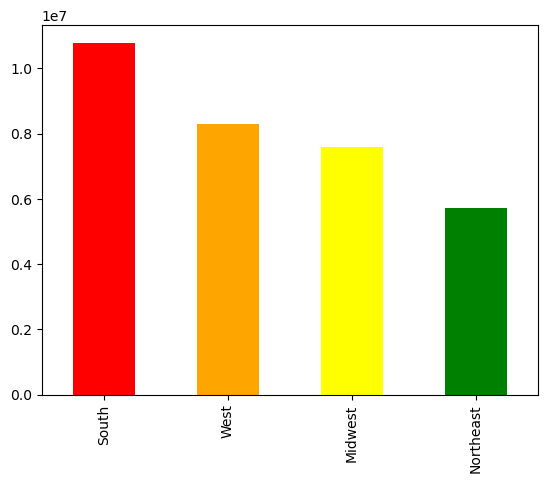

In [18]:
# Bar chart is made for regions
bar=ords_prods_merge['region'].value_counts().plot.bar(color=['red','orange','yellow','green'])

In [19]:
# Bar chart is saved
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_regions.png'))

# 07.2 Create Visualization- Loyalty Per Family Status

In [5]:
# Age loyalty was defined by groupby function
age_loyalty = ords_prods_merge.groupby(['Family Status','loyalty_flag']).size().unstack(fill_value=0)

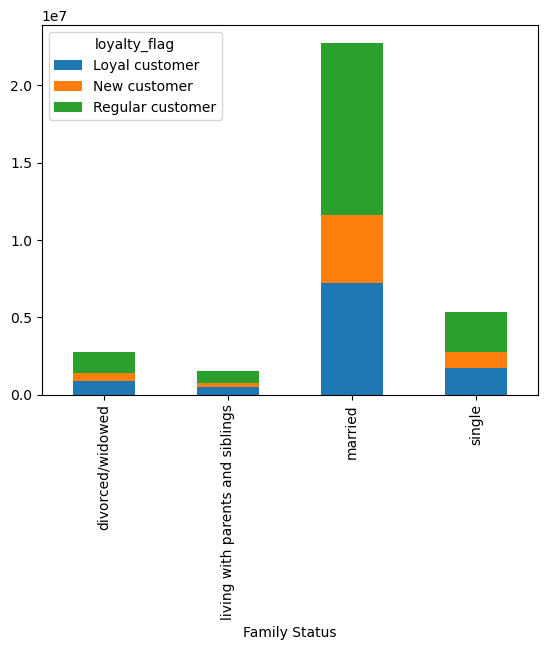

In [6]:
# Bar chart is made for loyalty_flag per family status
age_loyalty_counts = age_loyalty.plot.bar(stacked=True)
                        

In [85]:
# Bar chart is saved
age_loyalty_counts.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_loyalty_countsl.png'))

# 07.3 Create Visualization-  Favourite Departments Per Gender

In [14]:
# gender_department was defined by groupby function
gender_department = ords_prods_merge.groupby(['department_id','Gender']).size().unstack(fill_value=0)

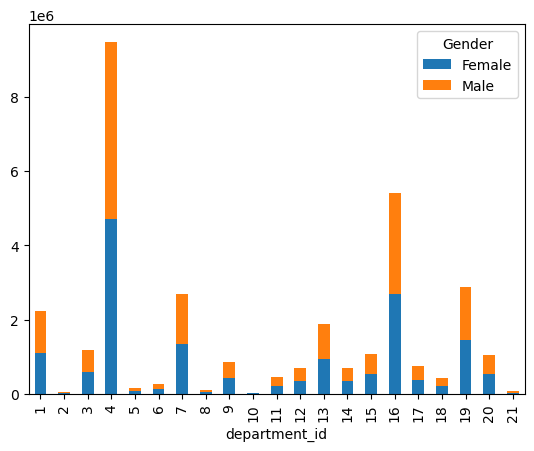

In [15]:
# Bar chart is made
gender = gender_department.plot.bar(stacked=True )

In [86]:
# Bar chart is saved
gender.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'gender.png'))

# 07.4 Create Visualization- Count of Customers by Child Status

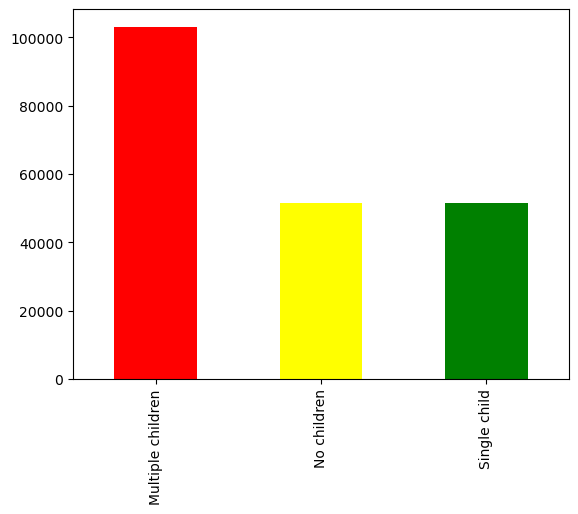

In [149]:
# bar4 was defined by value_counts function
bar4=ords_prods_merge1['child_status'].value_counts().plot.bar(color=['red','yellow','green'])

In [91]:
# Bar chart is saved
bar4.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar4.png'))

# 07.5 Create Visualization-  Favourite Departments Per Income Group

In [92]:
# income_department was defined by groupby function
income_department= ords_prods_merge.groupby(['department_id','income_group']).size().unstack(fill_value=0)

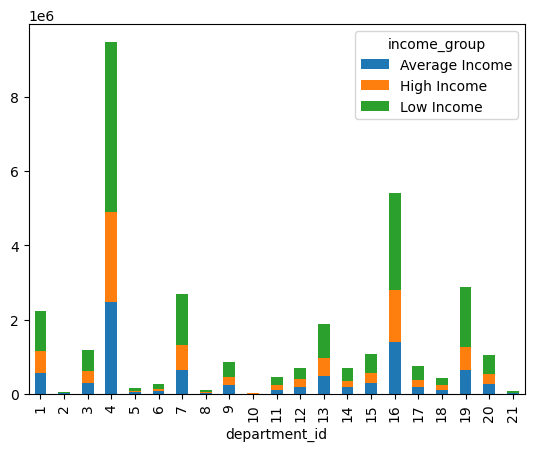

In [93]:
# Bar chart is created
income_department4 = income_department.plot.bar(stacked=True )

In [94]:
# Bar chart is saved
income_department4.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_department4.png'))

# 07.6 Create Visualization-  Favourite Departments Per Age Group

In [95]:
# age_department was defined by groupby function
age_department= ords_prods_merge.groupby(['department_id','age_group']).size().unstack(fill_value=0)

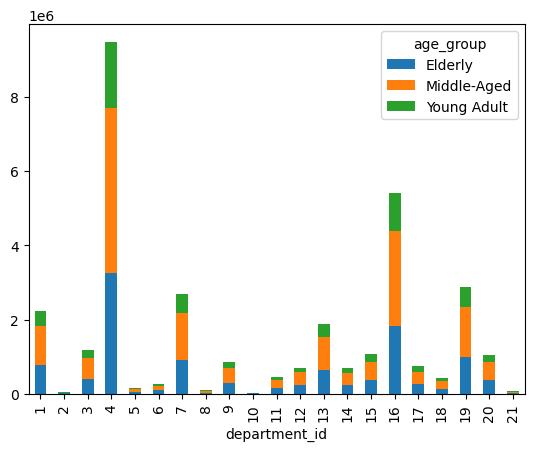

In [96]:
# Bar chart is created
age_department= age_department.plot.bar(stacked=True )

In [97]:
# Bar chart is saved
age_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_department.png'))

# 07.7 Create Visualization- Age Group Per Gender

In [99]:
# gender_region was defined by groupby function
gender_region= ords_prods_merge.groupby(['age_group','Gender']).size().unstack(fill_value=0)

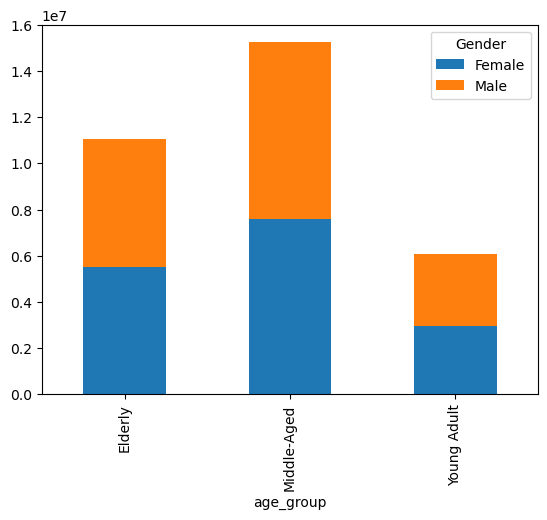

In [100]:
# Bar chart is created
gender_region2 = gender_region.plot.bar(stacked=True )

In [101]:
# Bar chart is saved
gender_region2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'gender_region2.png'))

# 07.8 Create Visualization- Age Group Per Region

In [102]:
# age_region was defined by groupby function
age_region= ords_prods_merge.groupby(['age_group','region']).size().unstack(fill_value=0)

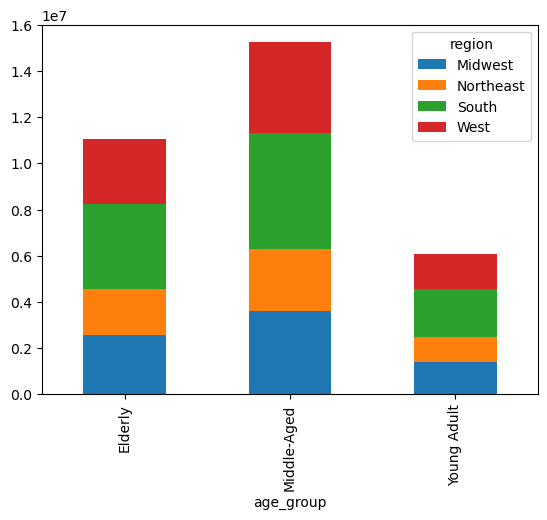

In [103]:
# Bar chart is created
age_region2 = age_region.plot.bar(stacked=True )

In [104]:
# Bar chart is saved
age_region2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_region2.png'))

# 07.9 Create Visualization- Order Time of the Day Per Age Group

In [105]:
# age_time was defined by groupby function
age_time= ords_prods_merge.groupby(['order_time_of_day','age_group']).size().unstack(fill_value=0)

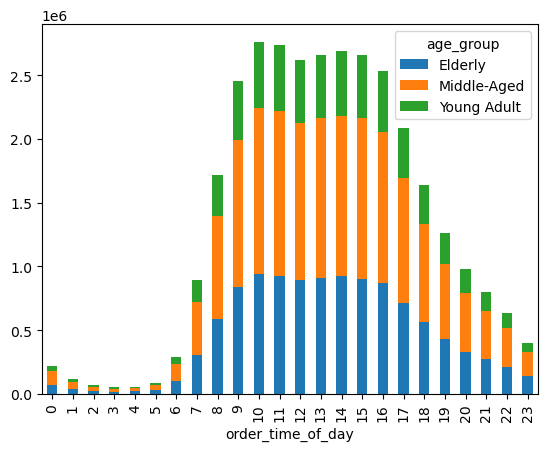

In [106]:
# Bar chart is created
age_time2 = age_time.plot.bar(stacked=True )

In [107]:
# bar chart is saved
age_time2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_time2.png'))

# 07.10 Create Visualization- Order Day of Week Per Age Group

In [108]:
# age_week was defined by groupby function
age_week= ords_prods_merge.groupby(['orders_day_of_week','age_group']).size().unstack(fill_value=0)

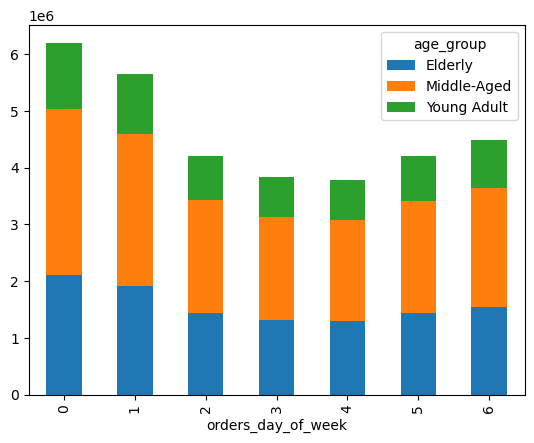

In [109]:
# Bar chart is created
age_week2 = age_week.plot.bar(stacked=True )

In [110]:
# Bar chart is saved
age_week2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_week2.png'))

# 07.11 Create Visualization- Order Day of Week Per Region

In [116]:
# region_week was defined by groupby function
region_week= ords_prods_merge.groupby(['orders_day_of_week','region']).size().unstack(fill_value=0)

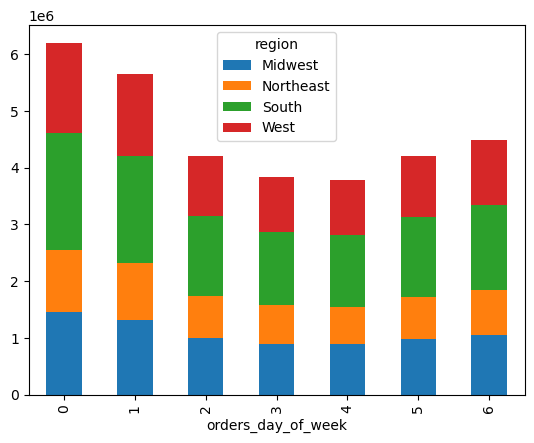

In [117]:
# Bar chart is created
region_week1 = region_week.plot.bar(stacked=True )

In [118]:
# Bar chart is saved
region_week1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_week.png'))

# 07.12 Create Visualization- Order Day of Week Per Loyalty

In [119]:
# spenders_week was defined by groupby function
spenders = ords_prods_merge.groupby(['orders_day_of_week','loyalty_flag']).size().unstack(fill_value=0)

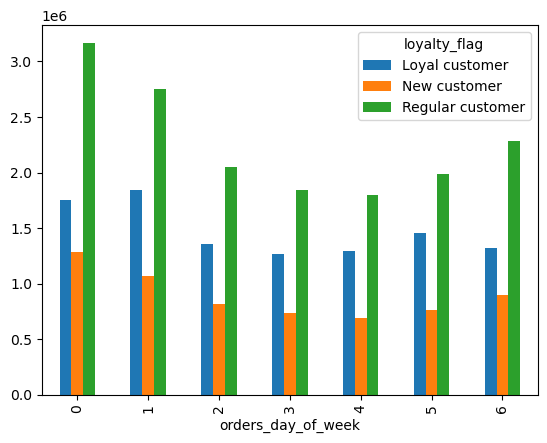

In [120]:
# Bar chart is created
dow_spending= spenders.plot.bar(stacked=False )

In [121]:
# Bar chart is saved
dow_spending.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dow_spending.png'))

# 07.13 Create Visualization- Order Day of Week Per Region

In [124]:
# region_income_week was defined by groupby function
region_income = ords_prods_merge.groupby(['region','income_group']).size().unstack(fill_value=0)

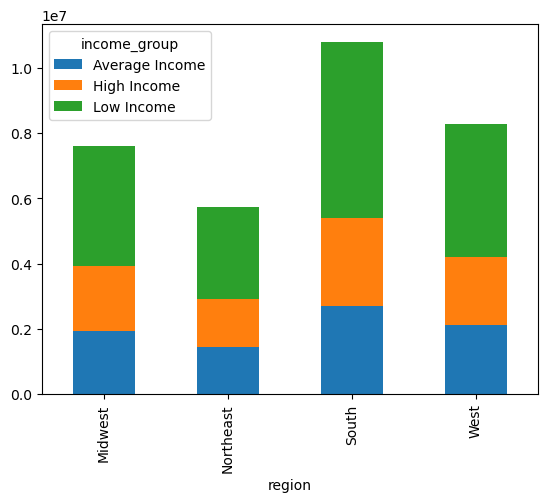

In [125]:
# bar chart is created
region_income2 = region_income.plot.bar(stacked=True )

In [126]:
# bar chart is saved
region_income2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dow_spending.png'))

# 07.14 Create Visualization- Order Day of Week Per Family Status

In [127]:
# dow_marital was defined by groupby function
dow_marital = ords_prods_merge.groupby(['orders_day_of_week','Family Status']).size().unstack(fill_value=0)

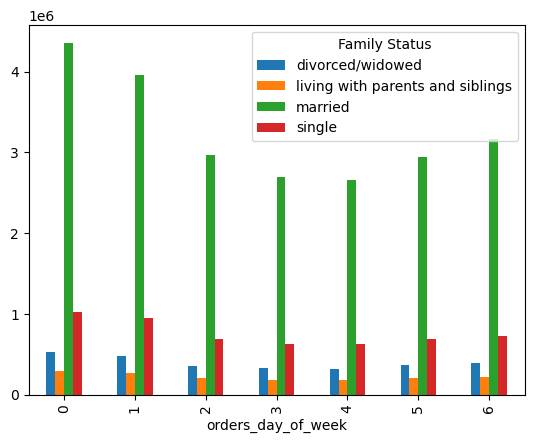

In [128]:
#Bar chart is created
dow_marital2= dow_marital.plot.bar(stacked=False )

In [129]:
# Bar chart is saved
dow_marital2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dow_marital2.png'))

# 07.15  Create Visualization- Spending Per Region

In [130]:
# spenders was defined by groupby function
spenders = ords_prods_merge.groupby(['spending_flag','region']).size().unstack(fill_value=0)

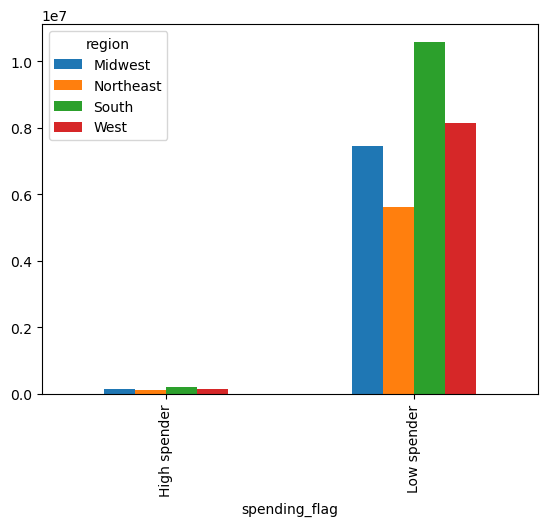

In [131]:
# Bar chart is created
spendersss= spenders.plot.bar(stacked=False )

In [132]:
# Bar chart is saved
spendersss.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'spendersss.png'))

# 07.16 Create Visualization- Customers Per Family Status

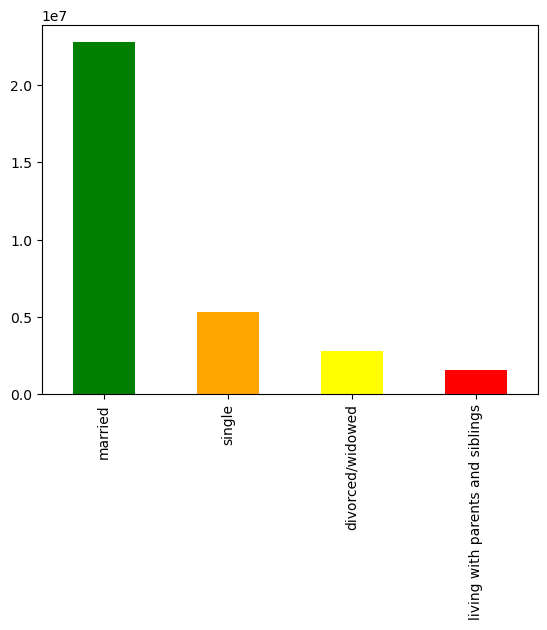

In [133]:
# bar9 was defined by value_counts function
bar9=ords_prods_merge['Family Status'].value_counts().plot.bar(color=['green','orange','yellow','red'])

In [134]:
# Bar chart is saved
bar9.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar9.png'))

# 07.17 Create Visualization- Customers Per Income Group

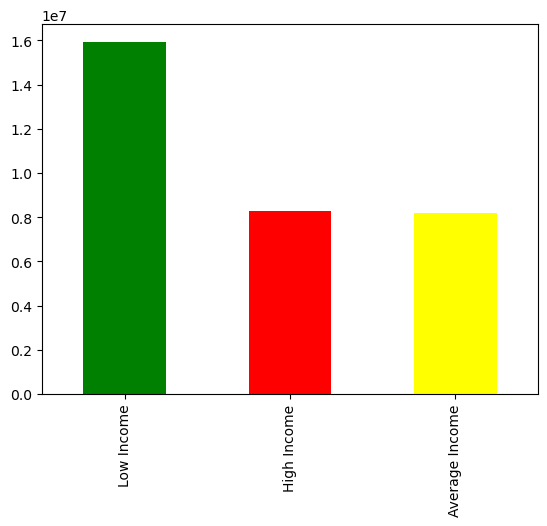

In [135]:
# bar7 was defined by value_counts function
bar7=ords_prods_merge['income_group'].value_counts().plot.bar(color=['green','red','yellow'])

In [136]:
#Bar chart is saved
bar7.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar7.png'))

# 08.Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [66]:
# Age group is aggregated by mean max and min
ords_prods_merge.groupby('age_group').agg({'prices': ['mean', 'min', 'max']})

prices              
                  mean  min      max
age_group                           
Elderly      11.763336  1.0  99999.0
Middle-Aged  12.061062  1.0  99999.0
Young Adult  12.171976  1.0  99999.0

In [72]:
# Gender is aggregated by mean max and min
ords_prods_merge.groupby('Gender').agg({'prices': ['mean', 'min', 'max']})

prices              
             mean  min      max
Gender                         
Female  11.892098  1.0  99999.0
Male    12.067137  1.0  99999.0

In [73]:
# loyalty flag is aggregated by mean max and min
ords_prods_merge.groupby('loyalty_flag').agg({'prices': ['mean', 'min', 'max']})

prices              
                       mean  min      max
loyalty_flag                             
Loyal customer    10.386335  1.0  99999.0
New customer      13.294669  1.0  99999.0
Regular customer  12.495717  1.0  99999.0

In [76]:
# Family Status  is aggregated by mean max and min
ords_prods_merge.groupby('Family Status').agg({'prices': ['mean', 'min', 'max']})

prices              
                                       mean  min      max
Family Status                                            
divorced/widowed                  11.453674  1.0  99999.0
living with parents and siblings  10.828768  1.0  99999.0
married                           12.005660  1.0  99999.0
single                            12.480849  1.0  99999.0

In [78]:
# region  is aggregated by mean max and min
ords_prods_merge.groupby('region').agg({'prices': ['mean', 'min', 'max']})

prices              
                mean  min      max
region                            
Midwest    12.715483  1.0  99999.0
Northeast  11.554997  1.0  99999.0
South      12.195577  1.0  99999.0
West       11.319834  1.0  99999.0

In [84]:
# frequency flag is aggregated by mean max and min
ords_prods_merge.groupby('frequency_flag').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                        mean  min   max
frequency_flag                                         
Frequent customer                   7.857627  0.0  30.0
Non-frequent customer              20.873798  0.0  30.0
Regular customer                   15.006043  0.0  30.0

In [85]:
# Family status is aggregated by mean max and min
ords_prods_merge.groupby('Family Status').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                                   mean  min   max
Family Status                                                     
divorced/widowed                              10.411525  0.0  30.0
living with parents and siblings              10.416529  0.0  30.0
married                                       10.474571  0.0  30.0
single                                        10.459174  0.0  30.0

In [88]:
# income group is aggregated by mean max and min
ords_prods_merge.groupby('income_group').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                 mean  min   max
income_group                                    
Average Income              10.437084  0.0  30.0
High Income                 10.400570  0.0  30.0
Low Income                  10.510509  0.0  30.0

In [90]:
# region is aggregated by mean max and min
ords_prods_merge.groupby('region').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                            mean  min   max
region                                     
Midwest                10.532670  0.0  30.0
Northeast              10.437681  0.0  30.0
South                  10.467030  0.0  30.0
West                   10.414801  0.0  30.0

In [91]:
# Gender is aggregated by mean max and min
ords_prods_merge.groupby('Gender').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                         mean  min   max
Gender                                  
Female              10.446475  0.0  30.0
Male                10.481025  0.0  30.0

In [92]:
# Age group is aggregated by mean max and min
ords_prods_merge.groupby('age_group').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                              mean  min   max
age_group                                    
Elderly                  10.451188  0.0  30.0
Middle-Aged              10.469868  0.0  30.0
Young Adult              10.471900  0.0  30.0

In [108]:
# Income group is aggregated by mean max and min
ords_prods_merge.groupby('income_group').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                 mean  min   max
income_group                                    
Average Income              10.437084  0.0  30.0
High Income                 10.400570  0.0  30.0
Low Income                  10.510509  0.0  30.0

# 09. Compare your customer profiles with regions and departments

In [67]:
# Frequency region is defined by groupby() function
frequency_region = ords_prods_merge.groupby(['spending_flag','age_group']).size().unstack(fill_value=0)

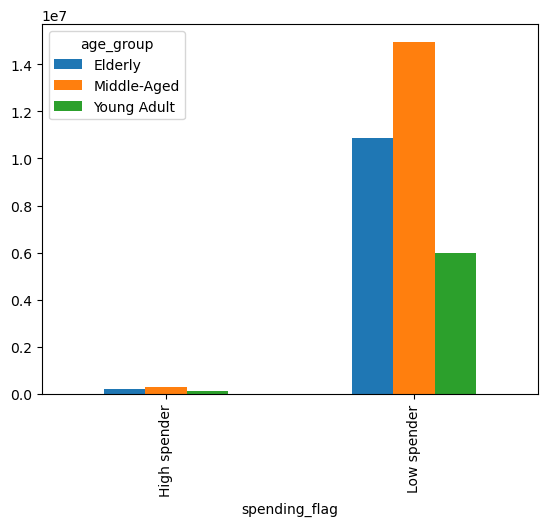

In [68]:
# Bar chart is created
freq_reg = frequency_region.plot.bar(stacked=False )

In [69]:
# Bar chart is saved
freq_reg.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'freq_reg.png'))

In [55]:
# spenderss is defined by groupby() function
spenderss = ords_prods_merge.groupby(['spending_flag','department_id']).size().unstack(fill_value=0)

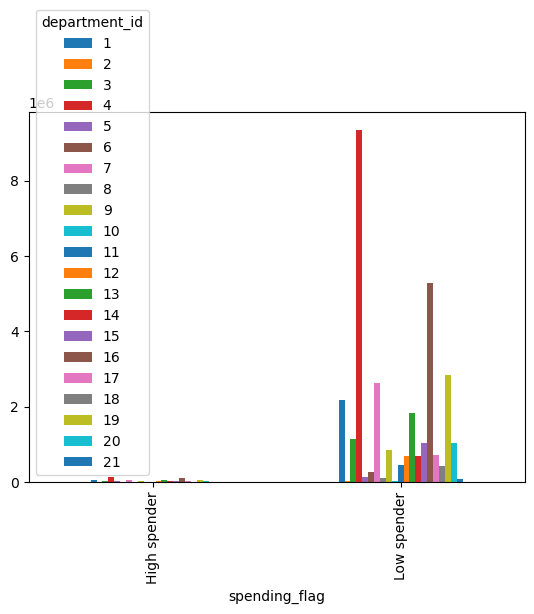

In [56]:
# Bar chart is created
department= spenderss.plot.bar(stacked=False)

In [57]:
# Bar chart is saved
department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'department.png'))

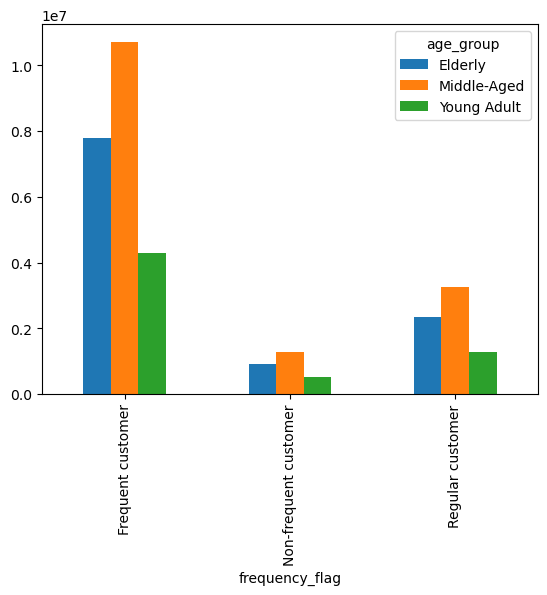

In [77]:
# Bar chart is created
age= frequency_age.plot.bar(stacked=False)

In [142]:
#bar chart is saved
age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age.png'))

In [75]:
# gender is defined by groupby() function
frequency_gender = ords_prods_merge.groupby(['department_id','Gender']).size().unstack(fill_value=0)

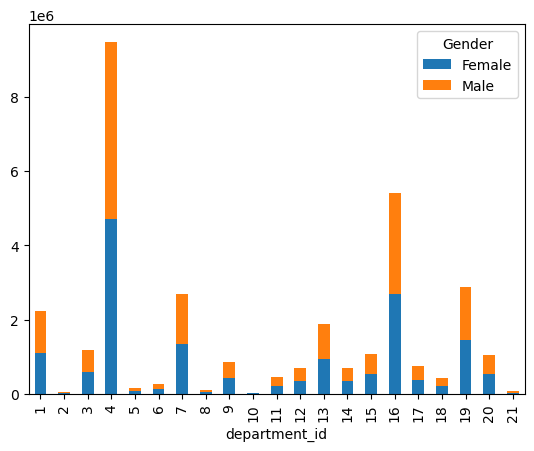

In [76]:
# bar chart is created
gender= frequency_gender.plot.bar(stacked=True)

In [145]:
# bar chart is saved
gender.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'gender.png'))

In [79]:
#spenders_region is created by groupby() function
spenders_region = ords_prods_merge.groupby(['spending_flag','region']).size().unstack(fill_value=0)

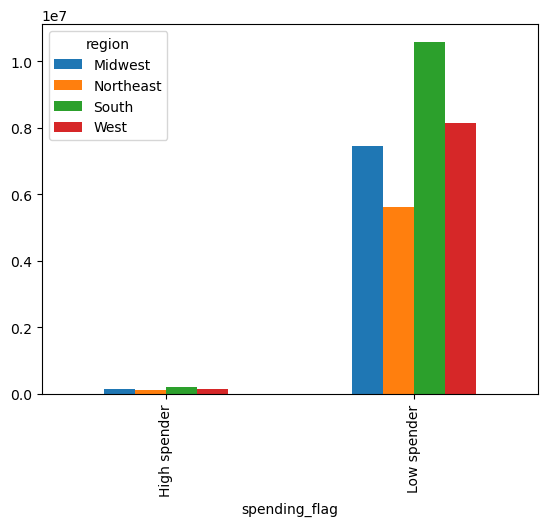

In [80]:
# bar chart is created
spender= spenders_region.plot.bar(stacked=False)

In [146]:
# bar chart is saved
spender.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'spender.png'))

### Even though the number of customers in Midwest are lower than west, there are nearly equal amount of high spenders. This data can be used to profile high-end products to midwest. 

# 10 Find Further Answers

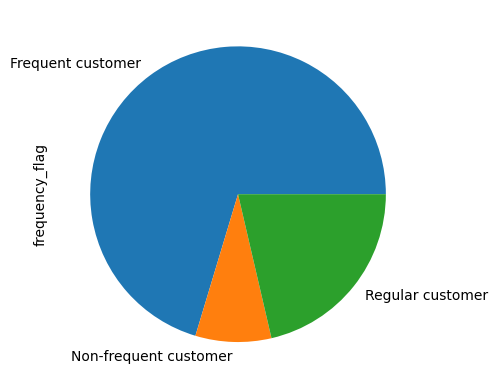

In [58]:
# frequency is defined by value_counts 
frequency = ords_prods_merge['frequency_flag'].value_counts().sort_index().plot.pie()

In [147]:
# pie chart is saved
frequency.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'frequency.png'))

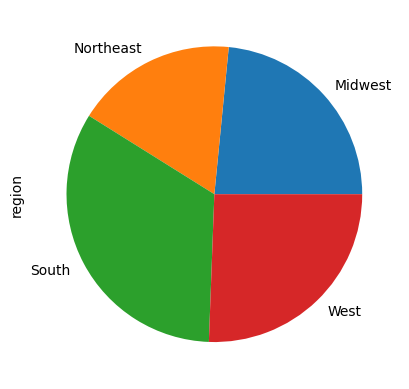

In [59]:
# regions is defined ny value_counts
regionss = ords_prods_merge['region'].value_counts().sort_index().plot.pie()

In [148]:
# pie chart is saved
regionss.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'regionss.png'))

In [29]:
order_habit_products = pd.crosstab(index = ords_prods_merge['department_id'],
                                         columns = ords_prods_merge['Gender'],
                                         normalize = 'index')


In [30]:
order_habit2 = pd.crosstab(index = ords_prods_merge['department_id'],
                                         columns = ords_prods_merge['Gender'])

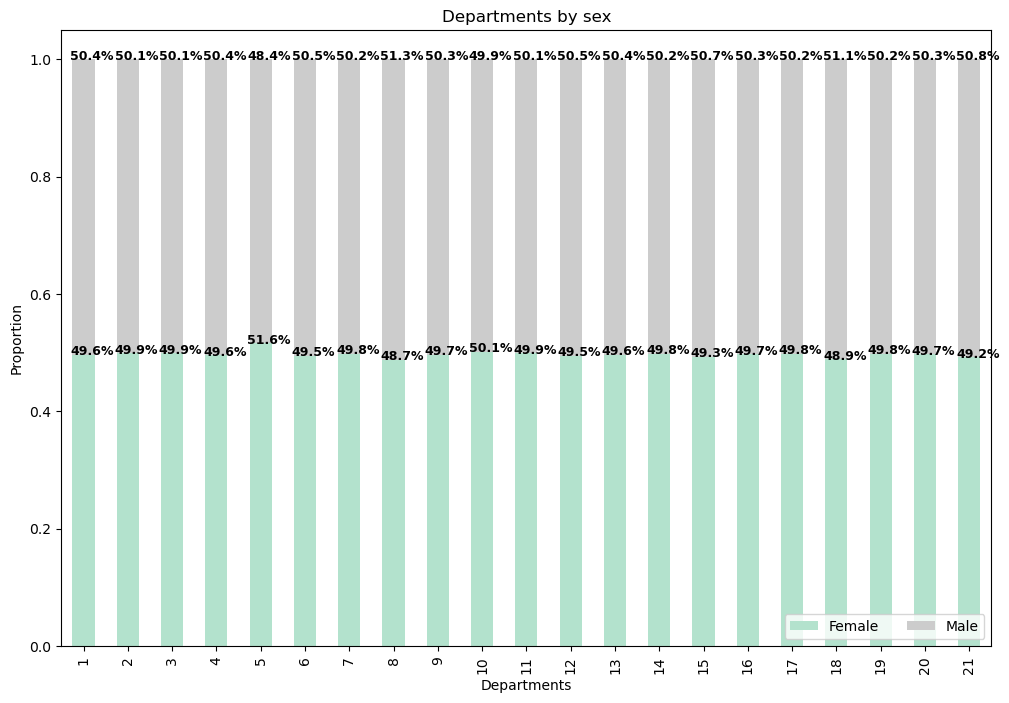

In [34]:
order_habit_bar = order_habit_products.plot( kind ='bar',
                                                stacked = True,
                                                colormap = 'Pastel2',
                                                figsize = (12, 8))
 
plt.title('Departments by sex')
plt.legend(loc = 'lower right', ncol = 3)
plt.xlabel('Departments')
plt.xticks(rotation = 90)
plt.ylabel('Proportion')

for n, x in enumerate([*order_habit2.index.values]):
    for (proportion, y_loc) in zip(order_habit_products.loc[x],
                                   order_habit_products.loc[x].cumsum()):
   
        plt.text(x= n -0.30,
                 y= y_loc,
                 s= f'{np.round(proportion * 100, 1)}%',
                 color ='black',
                 fontsize = 9,
                 fontweight = 'bold')

In [35]:
order_habit_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'regionssfjyg.png'))

In [49]:
order_habit_productsss = pd.crosstab(index = ords_prods_merge['department_id'],
                                         columns = ords_prods_merge['region'],
                                         normalize = 'index')


In [50]:
order_habit2 = pd.crosstab(index = ords_prods_merge['department_id'],
                                         columns = ords_prods_merge['region'])

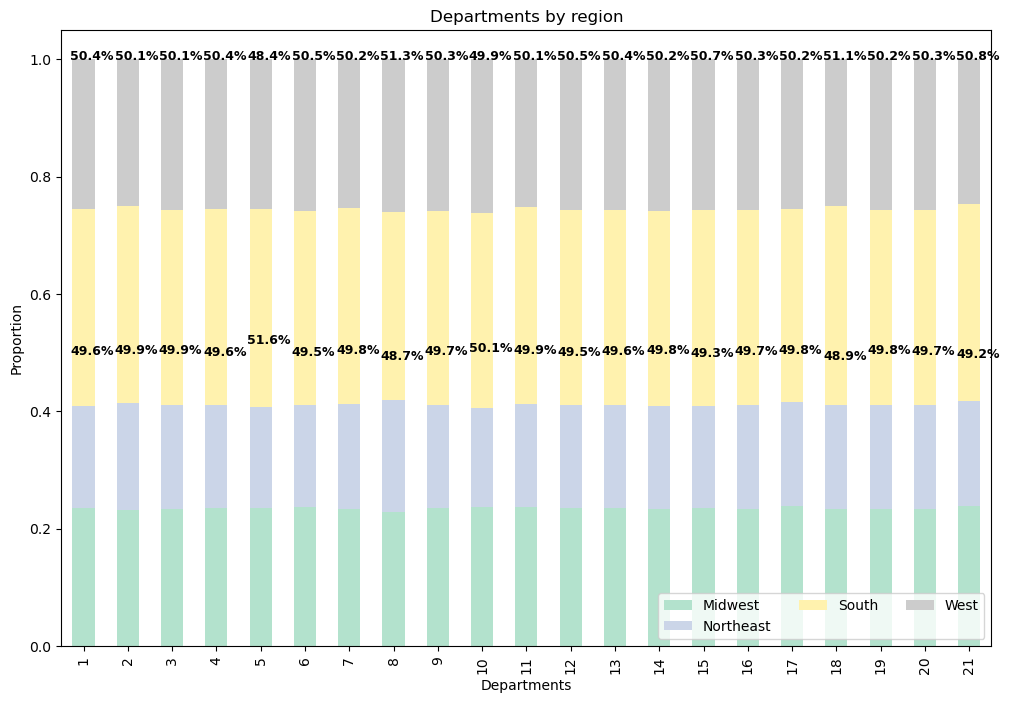

In [51]:
order_habit_bar = order_habit_productsss.plot( kind ='bar',
                                                stacked = True,
                                                colormap = 'Pastel2',
                                                figsize = (12, 8))
 
plt.title('Departments by region')
plt.legend(loc = 'lower right', ncol = 3)
plt.xlabel('Departments')
plt.xticks(rotation = 90)
plt.ylabel('Proportion')

for n, x in enumerate([*order_habit2.index.values]):
    for (proportion, y_loc) in zip(order_habit_products.loc[x],
                                   order_habit_products.loc[x].cumsum()):
   
        plt.text(x= n -0.30,
                 y= y_loc,
                 s= f'{np.round(proportion * 100, 1)}%',
                 color ='black',
                 fontsize = 9,
                 fontweight = 'bold')

In [52]:
order_habit_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'regionsshiufjseryg.png'))

<Axes: >

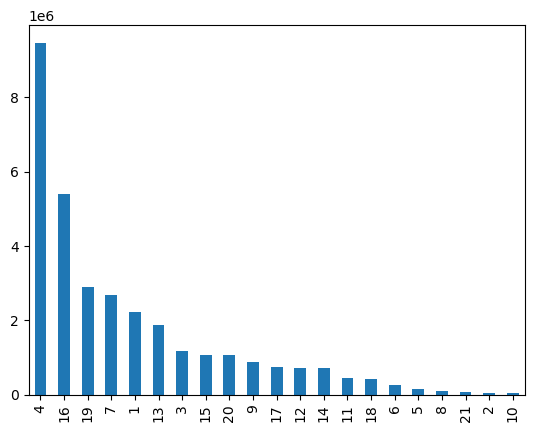

In [72]:
ords_prods_merge['department_id'].value_counts().plot.bar()

<Axes: >

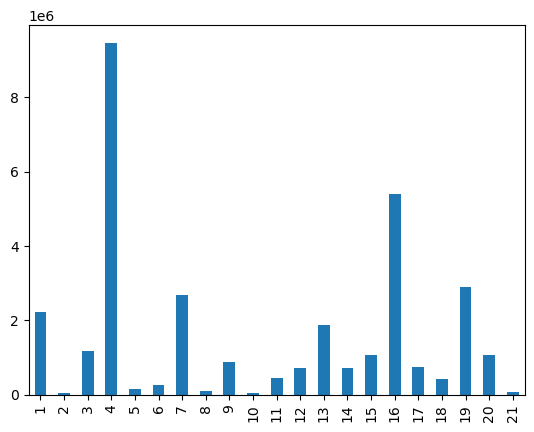

In [73]:
ords_prods_merge['department_id'].value_counts().sort_index().plot.bar()

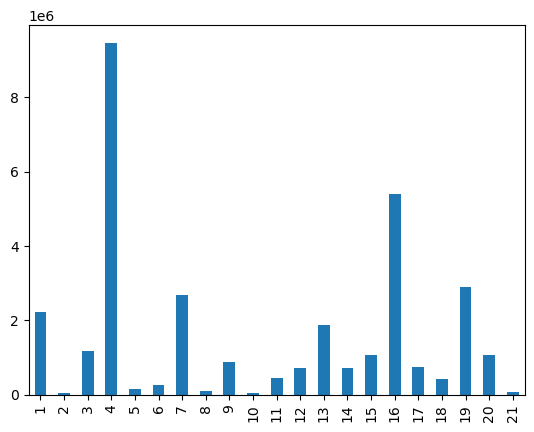

In [74]:
bar=ords_prods_merge['department_id'].value_counts().sort_index().plot.bar()

In [75]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'fdsgsf.png'))

# 11 Export the Data Set

In [83]:
# the data set is exported as pickle
ords_prods_merge.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_merge_final.pkl'))